# IRIS Flower Classification

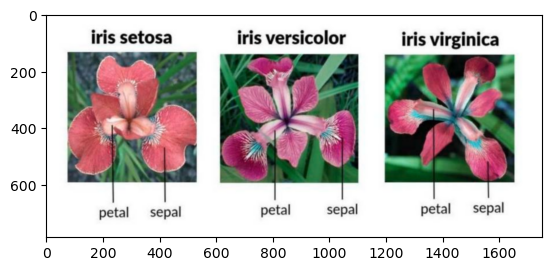

In [3]:
plt.imshow(img)

In [2]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
img=cv2.imread("Screenshot (224).png")

In [4]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [5]:
data=pd.read_csv("Iris.csv")

In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
#To display the basic stats of the database
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Data Preprocessing

In [11]:
#Checking for null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data Analysis

## Histograms

<Axes: >

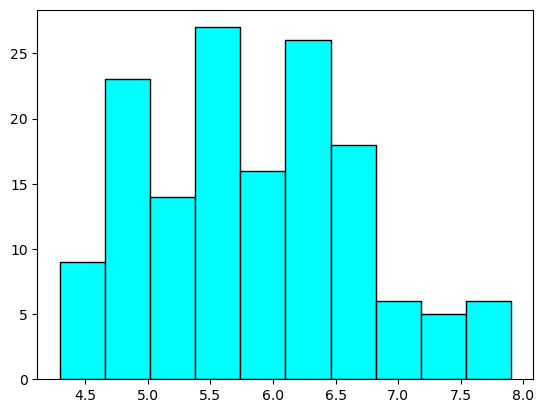

In [12]:
data["SepalLengthCm"].hist(color="cyan",edgecolor='black',grid=False)

<Axes: >

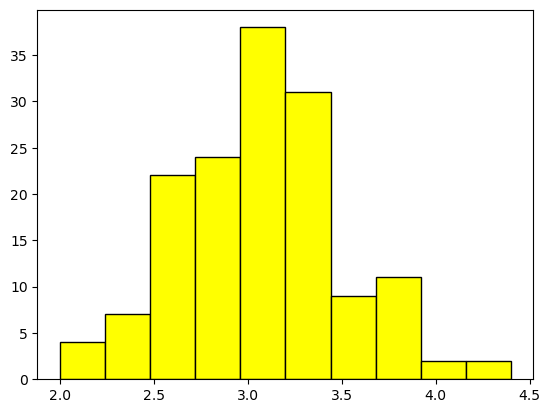

In [13]:
data["SepalWidthCm"].hist(color="yellow",edgecolor='black',grid=False)

<Axes: >

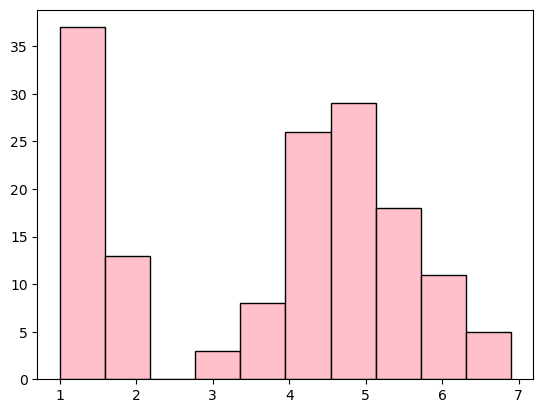

In [14]:
data["PetalLengthCm"].hist(color="pink",edgecolor='black',grid=False)

<Axes: >

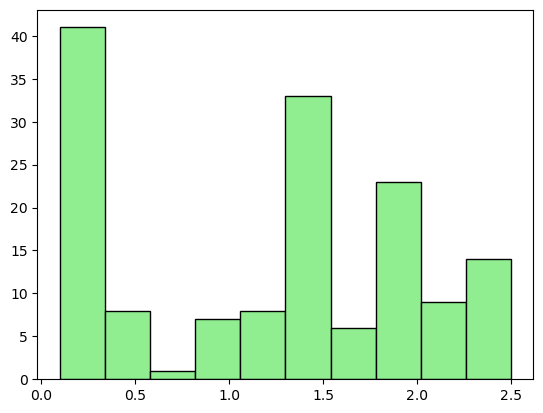

In [15]:
data["PetalWidthCm"].hist(color="lightgreen",edgecolor='black',grid=False)

E:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
E:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


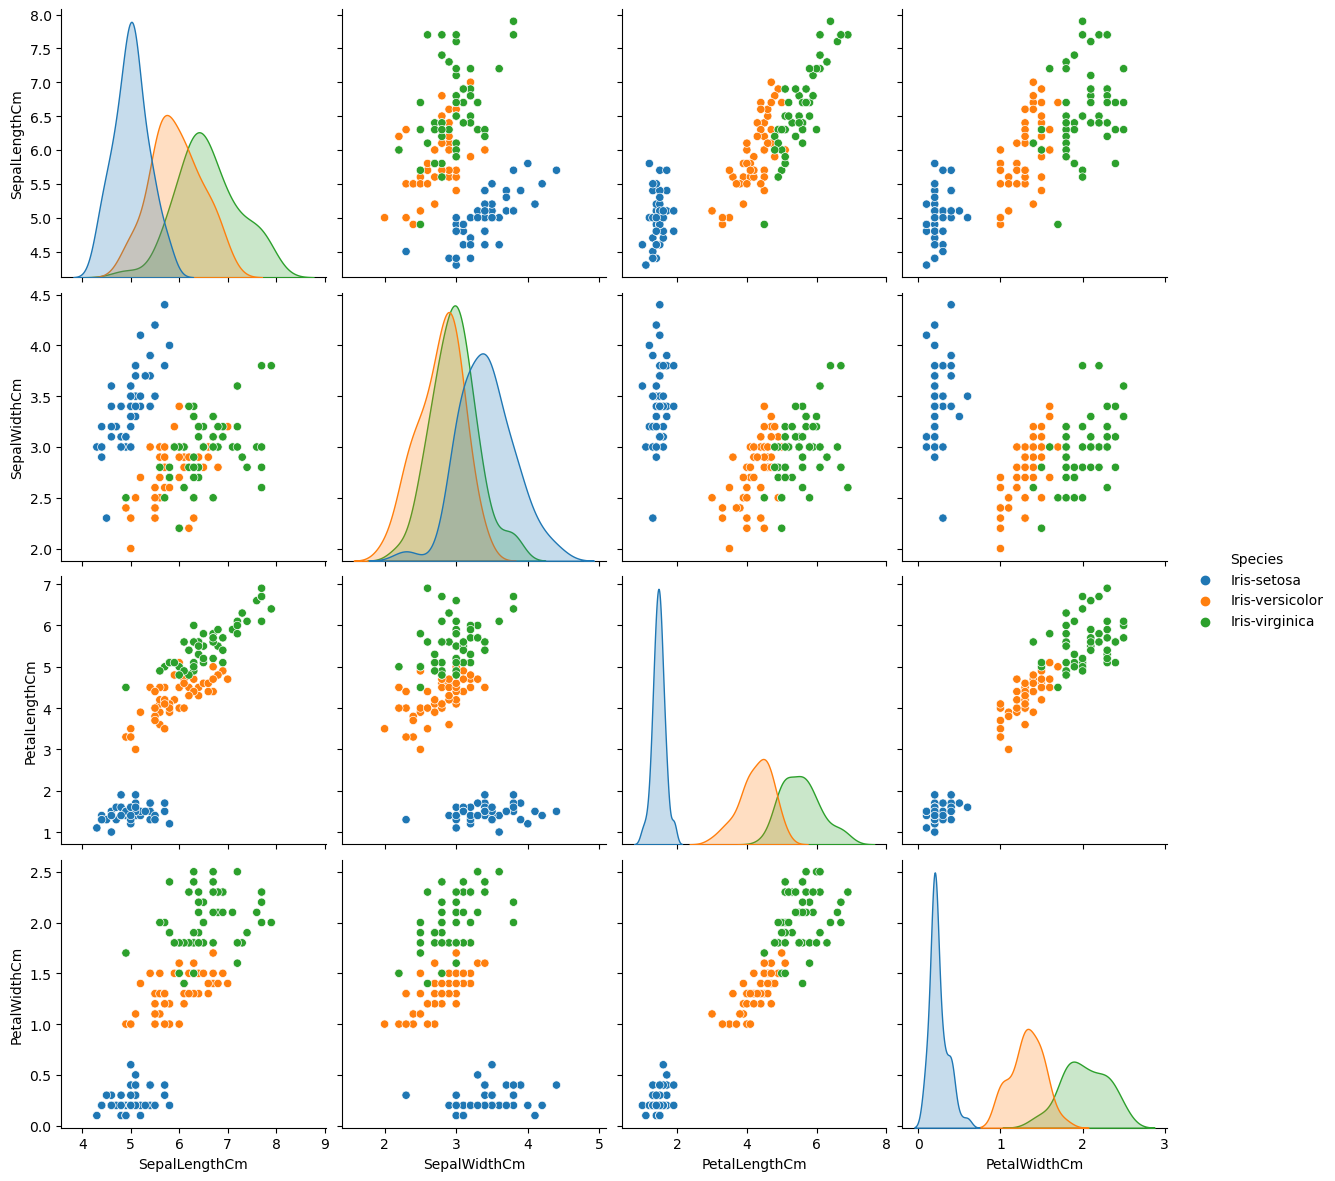

In [16]:
sns.pairplot(data.drop("Id", axis=1), hue="Species", size=3)
data=data.drop("Id", axis=1)

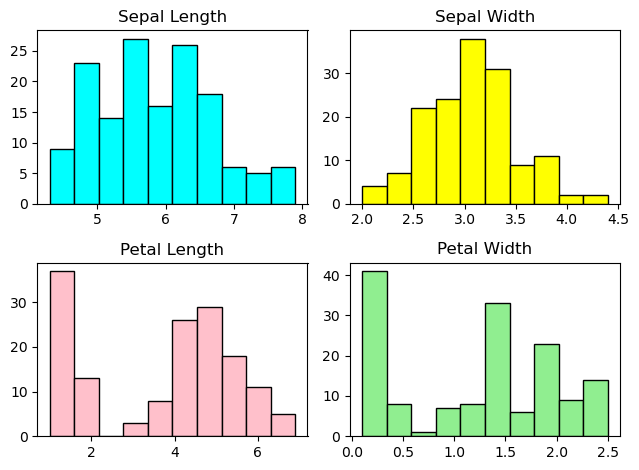

In [17]:
fig,ax=plt.subplots(2,2)
ax[0,0].hist(data["SepalLengthCm"],color="cyan",edgecolor='black')
ax[0,0].set_title("Sepal Length")

ax[0,1].hist(data["SepalWidthCm"],color="yellow",edgecolor='black')
ax[0,1].set_title("Sepal Width")

ax[1,0].hist(data["PetalLengthCm"],color="pink",edgecolor='black')
ax[1,0].set_title("Petal Length")

ax[1,1].hist(data["PetalWidthCm"],color="lightgreen",edgecolor='black')
ax[1,1].set_title("Petal Width")

plt.tight_layout()

E:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


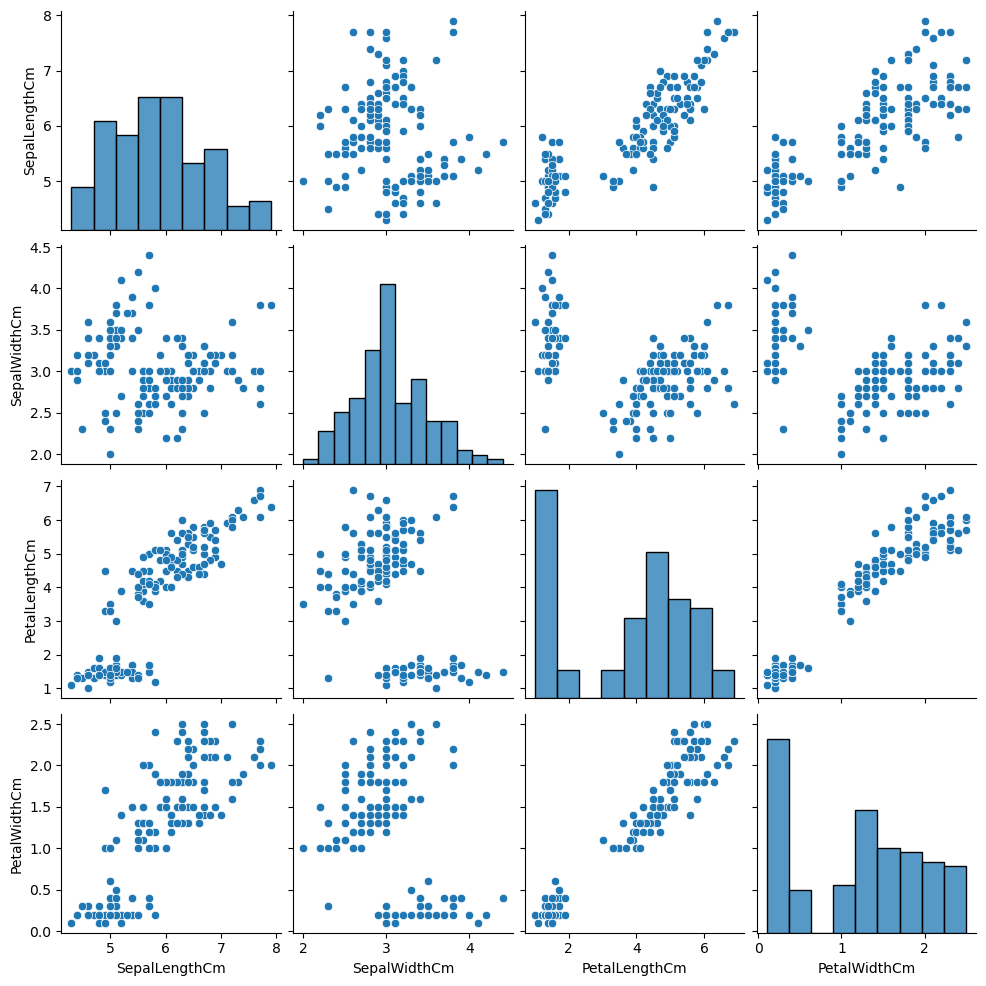

In [18]:
sns.pairplot(data)

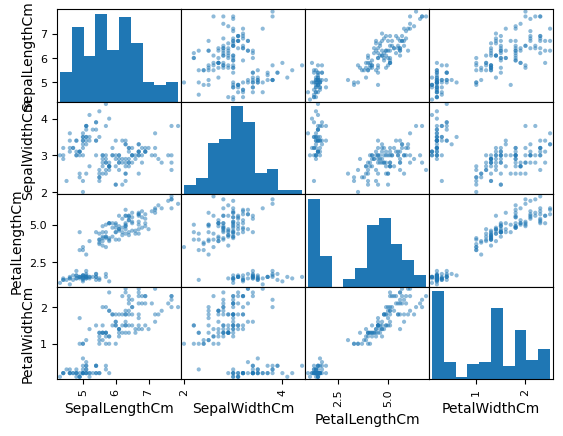

In [19]:
scatter_matrix(data)
plt.show()

In [20]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Scatter Plot

In [21]:
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
colors=["orange","cyan","hotpink"]

Sepal Length vs Sepal Width

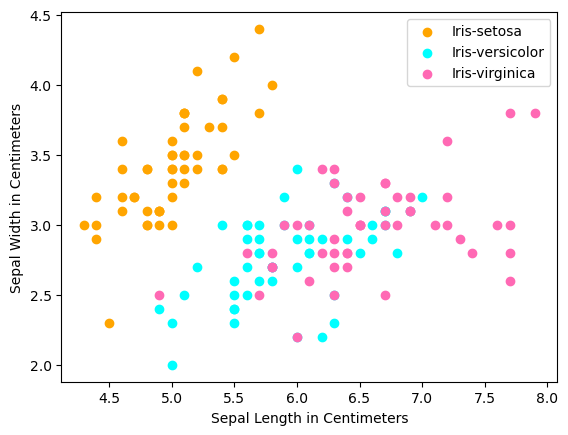

In [22]:
for i in range(3):
    x=data[data["Species"]==species[i]]
    plt.scatter(x['SepalLengthCm'],x["SepalWidthCm"],c=colors[i],label=species[i])
    plt.xlabel("Sepal Length in Centimeters")
    plt.ylabel("Sepal Width in Centimeters")
    plt.legend()

Petal Length vs Petal Width

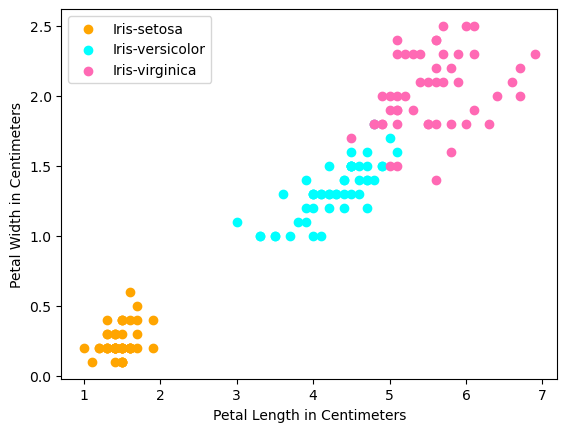

In [23]:
for i in range(3):
    x=data[data["Species"]==species[i]]
    plt.scatter(x['PetalLengthCm'],x["PetalWidthCm"],c=colors[i],label=species[i])
    plt.xlabel("Petal Length in Centimeters")
    plt.ylabel("Petal Width in Centimeters")
    plt.legend()

Petal Length vs Sepal Length

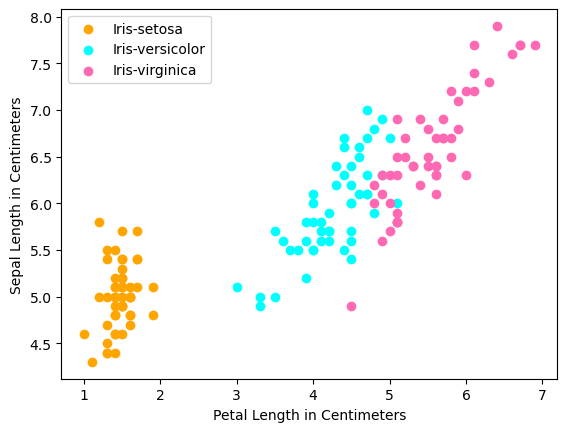

In [24]:
for i in range(3):
    x=data[data["Species"]==species[i]]
    plt.scatter(x['PetalLengthCm'],x["SepalLengthCm"],c=colors[i],label=species[i])
    plt.xlabel("Petal Length in Centimeters")
    plt.ylabel("Sepal Length in Centimeters")
    plt.legend()

Sepal Width vs Petal Width

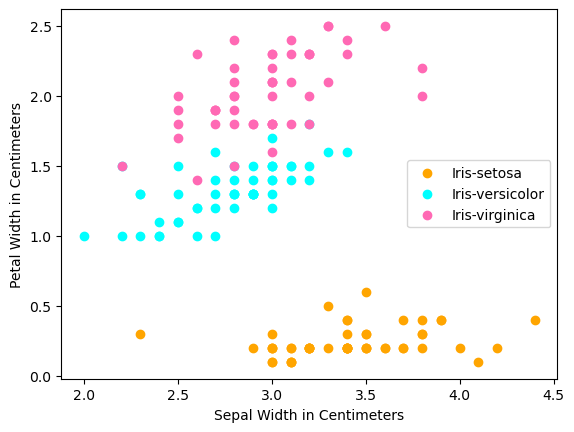

In [25]:
for i in range(3):
    x=data[data["Species"]==species[i]]
    plt.scatter(x['SepalWidthCm'],x["PetalWidthCm"],c=colors[i],label=species[i])
    plt.xlabel("Sepal Width in Centimeters")
    plt.ylabel("Petal Width in Centimeters")
    plt.legend()

# Label Encoder

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
lc=LabelEncoder

In [27]:
X = data.drop(['Species'], axis=1)
Y = data['Species']

In [28]:
X.shape

(150, 4)

In [29]:
Y.shape

(150,)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Model Training

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.17)

In [33]:
X_train.shape

(124, 4)

In [34]:
y_train.shape

(124,)

In [35]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
87,6.3,2.3,4.4,1.3
83,6.0,2.7,5.1,1.6
92,5.8,2.6,4.0,1.2
32,5.2,4.1,1.5,0.1
124,6.7,3.3,5.7,2.1


In [36]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
53,5.5,2.3,4.0,1.3
145,6.7,3.0,5.2,2.3
11,4.8,3.4,1.6,0.2
60,5.0,2.0,3.5,1.0
71,6.1,2.8,4.0,1.3


In [37]:
y_train.head()

87     Iris-versicolor
83     Iris-versicolor
92     Iris-versicolor
32         Iris-setosa
124     Iris-virginica
Name: Species, dtype: object

# Machine Learning Models

### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(random_state=0)

In [39]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [40]:
pred=model1.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score
matrix1=confusion_matrix(pred,y_test)
a_score1=accuracy_score(pred,y_test)

In [42]:
matrix1

array([[10,  0,  0],
       [ 0,  6,  1],
       [ 0,  1,  8]], dtype=int64)

In [43]:
a_score1

0.9230769230769231

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=9,random_state=0)

In [45]:
model2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=9, random_state=0)

In [46]:
pred1=model2.predict(X_test)

In [47]:
matrix2=confusion_matrix(pred1,y_test)
a_score2=accuracy_score(pred1,y_test)

In [48]:
matrix2

array([[10,  0,  0],
       [ 0,  6,  1],
       [ 0,  1,  8]], dtype=int64)

In [49]:
a_score2

0.9230769230769231

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
model3=lr=LogisticRegression(random_state=0)

In [51]:
model3.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [52]:
pred2=model3.predict(X_test)

In [53]:
matrix3=confusion_matrix(pred2,y_test)
a_score3=accuracy_score(pred2,y_test)

In [54]:
matrix3

array([[10,  0,  0],
       [ 0,  6,  1],
       [ 0,  1,  8]], dtype=int64)

In [55]:
a_score3

0.9230769230769231

In [56]:
SepalLengthCm=34
SepalWidthCm=4
PetalLengthCm=3
PetalWidthCm=1
pred1=model3.predict([[SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm]])

E:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [57]:
pred1

array(['Iris-versicolor'], dtype=object)

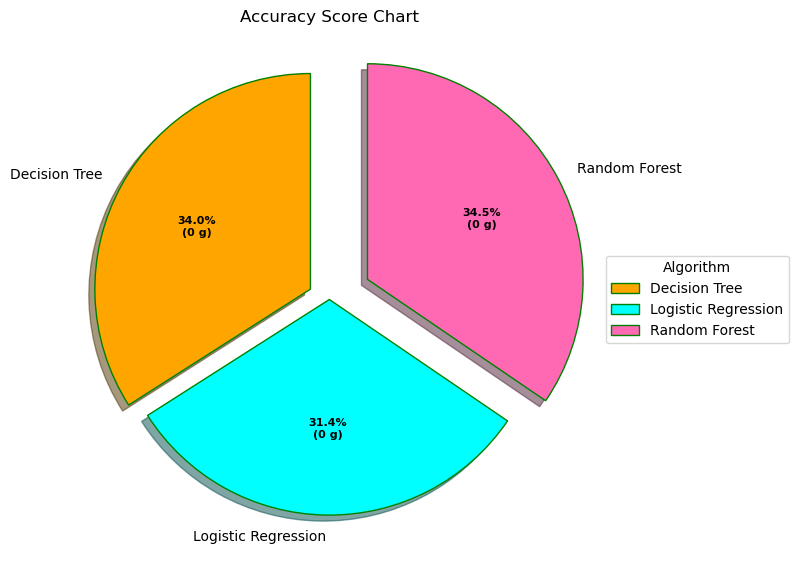

In [61]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Creating dataset
alg = ['Decision Tree','Logistic Regression' , 'Random Forest']
acc = [0.986, 0.911, 1.0]

# Creating explode data
explode = (0.1, 0.0, 0.2)

# Creating color parameters
colors = ("orange", "cyan", "hotpink")

# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "green"}

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(acc,
                                  autopct=lambda pct: func(pct, acc),  # Use acc instead of alg
                                  explode=explode,
                                  labels=alg,
                                  shadow=True,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="black"))

# Adding legend
ax.legend(wedges, alg,
          title="Algorithm",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Accuracy Score Chart")

# Show plot
plt.show()